In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..") # Adds higher directory to python modules path.

print(f"Current working dir is {os.getcwd()}")

from utils import *
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 7]

Current working dir is /home/jma/Python3.7/Cubist_2021_11/dataset_process


In [4]:
# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'
dtcol = 'data_date'
seccol = 'security_id'

ds_id = 9
ds_filename = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'

In [5]:
df = preprocess_dataset_from_one_to_seven(data_root, ds_id, dtcol=dtcol, seccol=seccol)

Getting data from file 'data_set_9.csv' for score 'd9'.

df.head():
      data_date security_id     d9
945  2010-01-04     1000201  40.93
946  2010-01-04     1000201  40.93
7529 2010-01-04    10038901   0.00
7530 2010-01-04    10038901   0.00
947  2010-01-04     1004601   4.55

df.tail():
          data_date security_id    d9
16169070 2017-12-29      995201  7.74
16173593 2017-12-29     9962801  0.00
16173594 2017-12-29     9962801  0.00
16169071 2017-12-29      996501  0.58
16169072 2017-12-29      996501  0.58

getting df shape of (16176736, 3)

WARNING! There are duplicated data_date and security_id pairs! There are total 8017231 duplicated rows
  Will follow pre-defined logics to remove bad data and get the average value
             min_d9        max_d9        avg_d9   avg_min_pct   avg_max_pct
count  8.159505e+06  8.159505e+06  8.159505e+06  7.808921e+06  7.808921e+06
mean   2.393630e+01  2.442450e+01  2.418040e+01           inf  9.889000e-01
std    3.292830e+01  3.322220e+01  3.

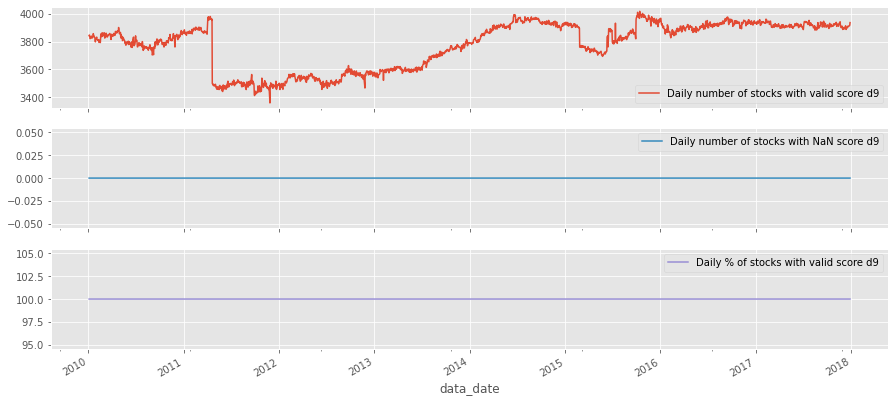

In [6]:
# plot the daily stock counts
plot_daily_stock_count(df, scorecol, dtcol=dtcol)

In [7]:
## Since 0 normally carries useless information in this type of sparse dataset, thus we replace 0 with NaN and drop them 
print(df.isnull().sum())
df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)
print(df.isnull().sum())

data_date      0
security_id    0
d9             0
dtype: int64
data_date      0
security_id    0
d9             0
dtype: int64


 Dropping all NaNs
                 d9
count  7.601242e+06
mean   2.537213e+01
std    3.352585e+01
min    1.000000e-02
25%    2.935000e+00
50%    9.450000e+00
75%    3.096500e+01
max    6.802500e+03


<AxesSubplot:>

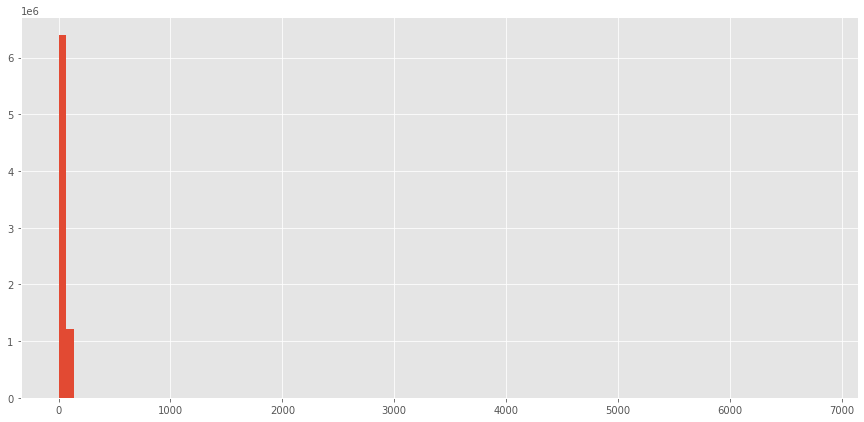

In [8]:
print(" Dropping all NaNs")
df.dropna(subset=[scorecol], inplace=True)
print(df.describe())
df[scorecol].hist(bins=100)

In [9]:
print("Loading the generated research universe")
rsch_universe = pd.read_csv(os.path.join(data_root, 'new_processed_csvs/new_rsch_universe.csv.gz'), compression='gzip',
                            usecols=[dtcol, seccol],
                            parse_dates=[dtcol], dtype={seccol: str})

Loading the generated research universe


In [10]:
print("Merging the dataset with research universe\n")
data = pd.merge(df, rsch_universe, on=[dtcol, seccol], how='inner')
print("Counting NaNs for each column.\n", data.isnull().sum())

Merging the dataset with research universe

Counting NaNs for each column.
 data_date      0
security_id    0
d9             0
dtype: int64


<AxesSubplot:title={'center':'Daily d9 #stocks falling into the trading universe'}, xlabel='data_date'>

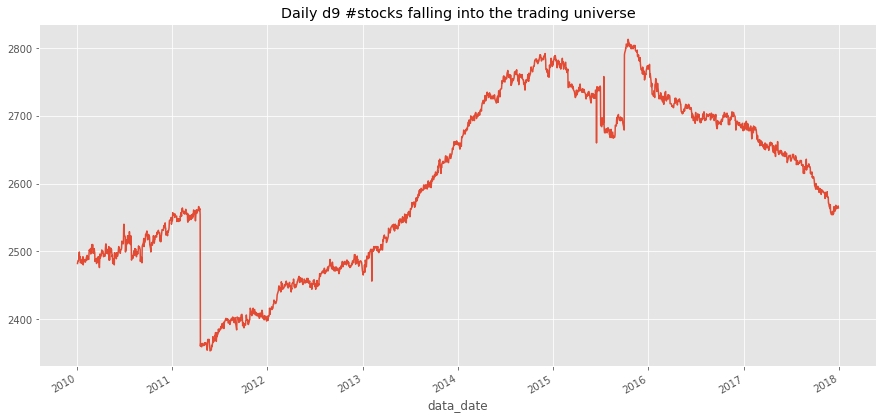

In [11]:
data.groupby(dtcol).size().plot(title=f'Daily {scorecol} #stocks falling into the trading universe')

In [ ]:
save_file_path = os.path.join(data_root, f'new_processed_csvs/new_data_{ds_id}.csv.gz')
print(f"data is saved to {save_file_path}")
data.to_csv(save_file_path, index=False, compression='gzip')

data is saved to /home/jma/Python3.7/Cubist_2021_11/new_processed_csvs/new_data_9.csv.gz


In [2]:
# def process_raw_csv_data(data, dtcol, seccol, numericcols=None):
#     data = data.copy()
#     data[dtcol] = data[dtcol].apply(lambda x: pd.Timestamp(str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:8]))
#     data[seccol] = data[seccol].astype(str)
#     if numericcols:
#         data[numericcols] = data[numericcols].apply(lambda x: pd.to_numeric(x, errors='coerce'))
#     return data

def plot_timeseries_dist(df, scorecol, dtcol, plot_min_max=False):
    
    if plot_min_max:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.min(), x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8), x.max()],
                 index=['Min', '20%', '40%', '60%', '80%', 'Max']))
    else:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8)],
                 index=['20%', '40%', '60%', '80%']))
    ts_series.unstack().plot()

In [3]:
ds_id = 9
csvfile = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'
dtcol = 'data_date'
seccol = 'security_id'

print(f"using scorecol '{scorecol}'")

with zipfile.ZipFile(os.path.join(data_root, 'data_sets.zip')) as zf:
    df = pd.read_csv(zf.open(csvfile), parse_dates=['data_date'], dtype={'security_id': str})
    df[scorecol] = pd.to_numeric(df[scorecol], errors='coerce')
    df.sort_values(by=['data_date', 'security_id'], inplace=True)

using scorecol 'd9'


In [4]:
print(df.duplicated(subset=[dtcol, seccol]).sum())
print(df.shape)

8017231
(16176736, 3)


In [5]:
print(df.dtypes)
print(df.duplicated(subset=[dtcol, seccol]).sum())
print(df.shape)

data_date      datetime64[ns]
security_id            object
d9                    float64
dtype: object
8017231
(16176736, 3)


In [6]:
df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)

In [7]:
avg_df = df.groupby([dtcol, seccol], as_index=False)[scorecol].mean()

In [8]:
min_df = df.groupby([dtcol, seccol], as_index=False)[scorecol].min()

In [9]:
max_df = df.groupby([dtcol, seccol], as_index=False)[scorecol].max()

In [10]:
from functools import reduce
compare_df = reduce(lambda x, y: pd.merge(x, y, how='outer'), 
                    [avg_df.rename(columns={scorecol: f'avg_{scorecol}'}), min_df.rename(columns={scorecol: f'min_{scorecol}'}),
                     max_df.rename(columns={scorecol: f'max_{scorecol}'})])
compare_df.head()

data_date security_id  avg_d9  min_d9  max_d9
0 2010-01-04     1000201  40.930   40.93   40.93
1 2010-01-04    10038901     NaN     NaN     NaN
2 2010-01-04     1004601   4.615    4.55    4.68
3 2010-01-04     1004801  11.410   11.38   11.44
4 2010-01-04     1006101  24.060   24.01   24.11

In [11]:
compare_df['min_avg_pct'] = compare_df[ f'avg_{scorecol}'] / compare_df[f'min_{scorecol}']
compare_df['max_avg_pct'] = compare_df[ f'avg_{scorecol}'] / compare_df[f'max_{scorecol}']
print(compare_df.describe())
print(compare_df['max_avg_pct'].nsmallest(1000))
print(compare_df.loc[compare_df['max_avg_pct'].idxmin()])

             avg_d9        min_d9        max_d9   min_avg_pct   max_avg_pct
count  7.808921e+06  7.808921e+06  7.808921e+06  7.808921e+06  7.808921e+06
mean   2.529875e+01  2.507643e+01  2.552107e+01  1.112544e+00  9.896361e-01
std    3.337341e+01  3.329368e+01  3.354525e+01  9.421892e+00  3.926748e-02
min    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e+00  5.000500e-01
25%    2.915000e+00  2.860000e+00  2.950000e+00  1.000000e+00  9.938102e-01
50%    9.470000e+00  9.320000e+00  9.580000e+00  1.000703e+00  9.992978e-01
75%    3.106500e+01  3.051000e+01  3.148000e+01  1.006267e+00  1.000000e+00
max    6.802500e+03  6.802500e+03  6.802500e+03  5.000500e+03  1.000000e+00
5819942    0.500050
4716336    0.500052
4014341    0.500055
3404889    0.500059
3408707    0.500059
             ...   
3253423    0.501906
4144079    0.501908
4501020    0.501908
1589216    0.501909
5335398    0.501915
Name: max_avg_pct, Length: 1000, dtype: float64
data_date      2015-10-02 00:00:00
security_id  

In [12]:
print(compare_df['min_avg_pct'].describe())
print(compare_df['max_avg_pct'].describe())
compare_df = compare_df.loc[(compare_df['min_avg_pct'] <= 1.10) & (compare_df['max_avg_pct'] >= 0.90)]

count    7.808921e+06
mean     1.112544e+00
std      9.421892e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000703e+00
75%      1.006267e+00
max      5.000500e+03
Name: min_avg_pct, dtype: float64
count    7.808921e+06
mean     9.896361e-01
std      3.926748e-02
min      5.000500e-01
25%      9.938102e-01
50%      9.992978e-01
75%      1.000000e+00
max      1.000000e+00
Name: max_avg_pct, dtype: float64


<AxesSubplot:xlabel='data_date'>

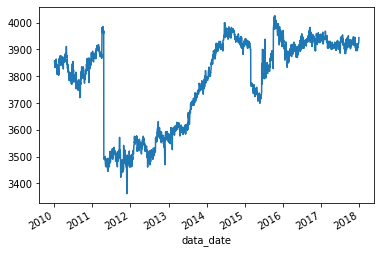

In [13]:
df = compare_df[['data_date', 'security_id',  f'avg_{scorecol}']].rename(columns={ f'avg_{scorecol}': scorecol})
assert not df.duplicated(subset=[dtcol, seccol]).any()
df.groupby("data_date").size().plot()

In [14]:
df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)
print(df.head(), '\n\n')
print(df.tail(), '\n\n')
print(df.shape, '\n\n')
print(df.dtypes, '\n\n')
print(df.isnull().sum(), '\n\n')
print(df.describe(), '\n\n')

   data_date security_id       d9
0 2010-01-04     1000201   40.930
2 2010-01-04     1004601    4.615
3 2010-01-04     1004801   11.410
4 2010-01-04     1006101   24.060
5 2010-01-04    10062201  100.000 


         data_date security_id      d9
8159498 2017-12-29     9827901  100.00
8159499 2017-12-29      985601   20.93
8159501 2017-12-29      993201  100.00
8159502 2017-12-29      995201    7.74
8159504 2017-12-29      996501    0.58 


(7613502, 3) 


data_date      datetime64[ns]
security_id            object
d9                    float64
dtype: object 


data_date      0
security_id    0
d9             0
dtype: int64 


                 d9
count  7.613502e+06
mean   2.539847e+01
std    3.355023e+01
min    1.000000e-02
25%    2.930000e+00
50%    9.460000e+00
75%    3.102000e+01
max    6.802500e+03 




In [15]:
print("shape before dropping NaNs", df.shape)
df.dropna(subset=[scorecol], inplace=True)
print("shape after dropping NaNs", df.shape)

shape before dropping NaNs (7613502, 3)
shape after dropping NaNs (7613502, 3)


In [ ]:
# df = process_raw_csv_data(df, dtcol, seccol, numericcols=None)

<AxesSubplot:xlabel='data_date'>

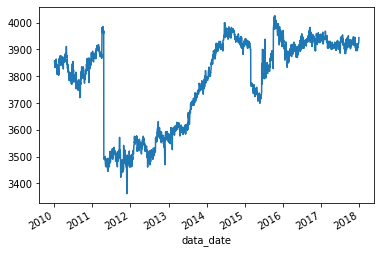

In [16]:
df.groupby(dtcol).size().plot()

In [17]:
df.head()

data_date security_id       d9
0 2010-01-04     1000201   40.930
2 2010-01-04     1004601    4.615
3 2010-01-04     1004801   11.410
4 2010-01-04     1006101   24.060
5 2010-01-04    10062201  100.000

In [18]:
df[scorecol].describe()

count    7.613502e+06
mean     2.539847e+01
std      3.355023e+01
min      1.000000e-02
25%      2.930000e+00
50%      9.460000e+00
75%      3.102000e+01
max      6.802500e+03
Name: d9, dtype: float64

In [19]:
rsch_universe = pd.read_csv('/home/jma/Python3.7/Cubist_2021_11/rsch_universe.csv.gz',
                            usecols=['data_date', 'security_id'],
                            parse_dates=['data_date'], dtype={'security_id': str})

In [20]:
print(rsch_universe.head(), '\n\n')
print(rsch_universe.tail(), '\n\n')
print(rsch_universe.dtypes, '\n\n')
print(df.dtypes, '\n\n')
print(df.shape, '\n\n')
print(rsch_universe.shape, '\n\n')

   data_date security_id
0 2010-01-04     1000201
1 2010-01-04     1004601
2 2010-01-04      100701
3 2010-01-04     1007201
4 2010-01-04     1009601 


         data_date security_id
5927170 2017-12-29      985601
5927171 2017-12-29     9931801
5927172 2017-12-29      995201
5927173 2017-12-29     9962801
5927174 2017-12-29      996501 


data_date      datetime64[ns]
security_id            object
dtype: object 


data_date      datetime64[ns]
security_id            object
d9                    float64
dtype: object 


(7613502, 3) 


(5927175, 2) 




In [21]:
data = pd.merge(df, rsch_universe, on=['data_date', 'security_id'], how='inner')
data.isnull().sum()

data_date      0
security_id    0
d9             0
dtype: int64

<AxesSubplot:xlabel='data_date'>

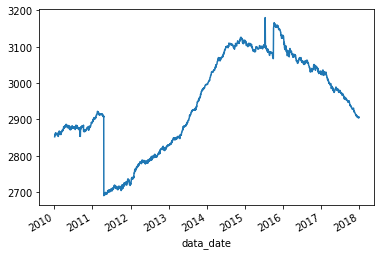

In [22]:
rsch_universe.groupby("data_date").size().plot()

In [23]:
data.to_csv(os.path.join(data_root, 'data_9.csv.gz'), index=False, compression='gzip')

In [24]:
ts_series = data.groupby(dtcol)[scorecol].apply(
    lambda x: pd.Series([x.min(), x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8), x.max()],
                         index=['Min', '20%', '40%', '60%', '80%', 'Max']))
ts_series = ts_series.unstack().reset_index()

<AxesSubplot:xlabel='data_date'>

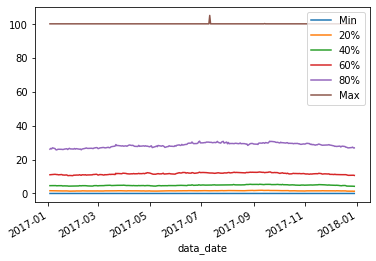

In [25]:
yr = '2017'
ts_series.loc[ts_series[dtcol].between(f'{yr}-01-01', f'{yr}-12-30')].set_index(dtcol).plot()

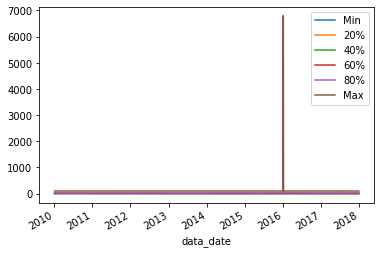

In [52]:
plot_timeseries_dist(data, scorecol, dtcol=dtcol, plot_min_max=True)
# d11 may be some market cap related measure 

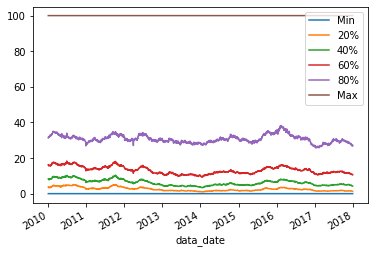

In [53]:
data[scorecol + '_adj'] = data[scorecol].clip(0, 100)
plot_timeseries_dist(data, scorecol + '_adj', dtcol=dtcol, plot_min_max=True)